# Packages Import and Cleaning and Normalization of Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
project_df = pd.read_csv("sgemm_product_dataset\sgemm_product.csv")

In [3]:
project_df['Run_Avg'] = project_df.iloc[:,14:18].mean(axis=1)

In [4]:
project_df=project_df.drop(columns=['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'])

In [5]:
project_df=project_df.dropna()
#project_df

In [6]:
project_df['Run_Avg'] = np.log(project_df['Run_Avg'])

In [7]:
normalized_df = (project_df - project_df.mean())/project_df.std()
normalized_df

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run_Avg
0,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,-0.999998,-0.999998,-0.999998,0.118479
1,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,-0.999998,-0.999998,0.999998,-0.228050
2,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,-0.999998,0.999998,-0.999998,-0.207353
3,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,-0.999998,0.999998,0.999998,-0.142960
4,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,0.999998,-0.999998,-0.999998,0.135765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,1.120450,1.120450,0.825764,2.294244,2.294244,1.558017,1.558017,0.999998,0.794054,0.794054,0.999998,-0.999998,0.999998,0.999998,-1.544386
241596,1.120450,1.120450,0.825764,2.294244,2.294244,1.558017,1.558017,0.999998,0.794054,0.794054,0.999998,0.999998,-0.999998,-0.999998,-0.920292
241597,1.120450,1.120450,0.825764,2.294244,2.294244,1.558017,1.558017,0.999998,0.794054,0.794054,0.999998,0.999998,-0.999998,0.999998,-0.942074
241598,1.120450,1.120450,0.825764,2.294244,2.294244,1.558017,1.558017,0.999998,0.794054,0.794054,0.999998,0.999998,0.999998,-0.999998,-1.129639


# Train-test data split and Gradient descent calculation Functions

In [8]:
def train_test(x):
    #x is the dataset you want to split and use for regression
    num_of_rows=int(len(x)*0.65)
    shuffle_project_df = x.sample(frac=1)
    training_set = shuffle_project_df[:num_of_rows]
    test_set = shuffle_project_df[num_of_rows:]
    return training_set,test_set

In [9]:
def gradient_descent(X,Y,beta,bias,lr,threshold):
    m=len(X)
    
    array_MSE=[]
    array_iteration=[]

    Y_pred = np.dot(X,beta) + bias
    count=0
    
    for i in range(1000):
        count+=1
        D_beta = (1/m)*lr*(X.T.dot(Y_pred - Y)) #derivative with respect to beta
        D_bias = (1/m)*lr*(np.sum(Y_pred - Y)) #derivative with respect to bias
        
        Y_pred = np.dot(X,beta) + bias
        beta = beta - D_beta
        bias = bias - D_bias
        MSE = (1/m) * np.sum(np.square(Y_pred-Y))
        array_MSE.append(MSE)
        array_iteration.append(i)
        
        if D_beta.mean() < threshold:
            count-=1
              
    return MSE, count, beta, bias, array_MSE, array_iteration

# Part 1: All 14 Features Selected with Multiple Learning Rates

In [10]:
normalized_df

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run_Avg
0,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,-0.999998,-0.999998,-0.999998,0.118479
1,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,-0.999998,-0.999998,0.999998,-0.228050
2,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,-0.999998,0.999998,-0.999998,-0.207353
3,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,-0.999998,0.999998,0.999998,-0.142960
4,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,-0.999998,0.999998,-0.999998,-0.999998,0.135765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,1.120450,1.120450,0.825764,2.294244,2.294244,1.558017,1.558017,0.999998,0.794054,0.794054,0.999998,-0.999998,0.999998,0.999998,-1.544386
241596,1.120450,1.120450,0.825764,2.294244,2.294244,1.558017,1.558017,0.999998,0.794054,0.794054,0.999998,0.999998,-0.999998,-0.999998,-0.920292
241597,1.120450,1.120450,0.825764,2.294244,2.294244,1.558017,1.558017,0.999998,0.794054,0.794054,0.999998,0.999998,-0.999998,0.999998,-0.942074
241598,1.120450,1.120450,0.825764,2.294244,2.294244,1.558017,1.558017,0.999998,0.794054,0.794054,0.999998,0.999998,0.999998,-0.999998,-1.129639


In [11]:
training_set, test_set = train_test(normalized_df)

In [12]:
X_train = training_set.iloc[:,:-1]
X_test = test_set.iloc[:,:-1]
Y_train = training_set['Run_Avg']
Y_test = test_set['Run_Avg']

## Train Data

0.43792382244208455
0.43791683331907727
0.5536146677734657
0.9046994770322573


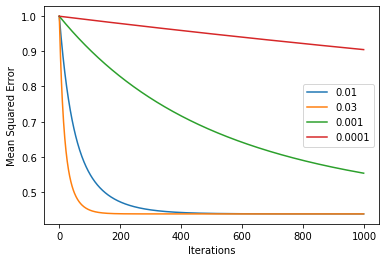

In [13]:
learning_rate = [0.01,0.03,0.001,0.0001]
new_MSE=[]
for lr in learning_rate:
    beta = np.c_[np.zeros(X_train.shape[1])]
    beta.shape=np.squeeze(beta).shape

    bias = np.c_[np.zeros(1)]
    bias.shape=np.squeeze(bias).shape
    
    MSE,count, beta, bias, array_MSE, array_iteration = gradient_descent(X_train,Y_train,beta,bias,lr,0.00000001)
    print(MSE)
    new_MSE.append(MSE)
    plt.plot(array_iteration,array_MSE,label=lr)
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.legend()

## Test Data

0.4403377208213243
0.4403312582014822
0.4403312582014822
0.4403312582014821


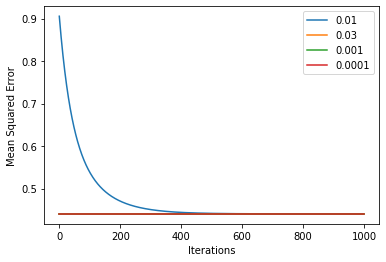

In [14]:
learning_rate = [0.01,0.03,0.001,0.0001]
new_MSE2=[]
for lr in learning_rate:
    MSE,count,beta, bias, array_MSE, array_iteration = gradient_descent(X_test,Y_test,beta,bias,lr,0.00000001)
    print(MSE)
    new_MSE2.append(MSE)
    plt.plot(array_iteration,array_MSE,label=lr)
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.legend()

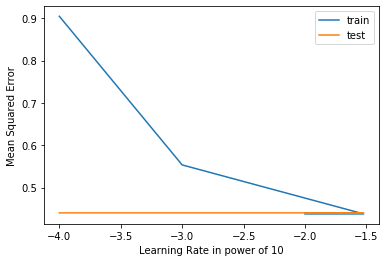

In [15]:
plt.plot(np.log10(learning_rate),new_MSE,label='train')
plt.xlabel('Learning Rate in power of 10')
plt.ylabel('Mean Squared Error')
plt.plot(np.log10(learning_rate),new_MSE2,label='test')
plt.xlabel('Learning Rate in power of 10')
plt.ylabel('Mean Squared Error')
plt.legend()

# Part 2 All Features Selected with Multiple Threshold Values

## Train Data

No. of Iterations required to reach Convergence with threshold  0.0001  is: 0
No. of Iterations required to reach Convergence with threshold  1e-05  is: 443
No. of Iterations required to reach Convergence with threshold  1e-06  is: 891
No. of Iterations required to reach Convergence with threshold  1e-07  is: 897
No. of Iterations required to reach Convergence with threshold  1e-08  is: 897


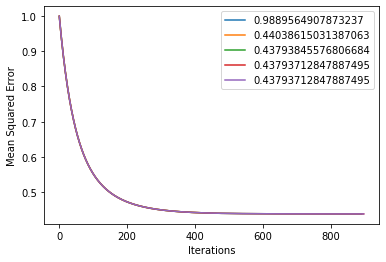

In [16]:
array_count=[]
new_MSE=[]
learning_rate = [0.01]
threshold = [0.0001,0.00001,0.000001,0.0000001,0.00000001]
for lr in learning_rate:
    for th in threshold:
        beta = np.c_[np.zeros(X_train.shape[1])]
        beta.shape=np.squeeze(beta).shape

        bias = np.c_[np.zeros(1)]
        bias.shape=np.squeeze(bias).shape
        
        MSE,count, beta, bias, array_MSE, array_iteration = gradient_descent(X_train,Y_train,beta,bias,lr,th)
        array_count.append(count)
        new_MSE.append(array_MSE[count+1])
        print('No. of Iterations required to reach Convergence with threshold ',th,' is:', count)
        plt.plot(array_iteration[:count+1],array_MSE[:count+1],label=array_MSE[count+1])
        plt.xlabel('Iterations')
        plt.ylabel('Mean Squared Error')
        plt.legend()

Text(0, 0.5, 'Iterations')

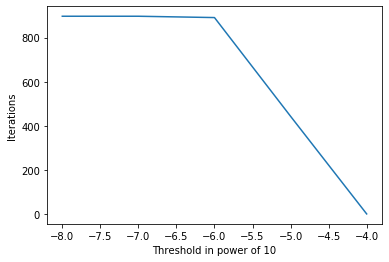

In [17]:
plt.plot(np.log10(threshold),array_count)
plt.xlabel('Threshold in power of 10')
plt.ylabel('Iterations')

## Test Data

In [18]:
array_count=[]
new_MSE2=[]
learning_rate = [0.01]
threshold = [0.0001,0.00001,0.000001,0.0000001,0.00000001]
for lr in learning_rate:
    for th in threshold:
        MSE, count, beta, bias, array_MSE, array_iteration = gradient_descent(X_test,Y_test,beta,bias,lr,th)
        array_count.append(count)
        new_MSE2.append(array_MSE[count+1])
        print(MSE,th)

0.440331258642898 0.0001
0.44033125820150076 1e-05
0.4403312582014821 1e-06
0.4403312582014821 1e-07
0.4403312582014822 1e-08


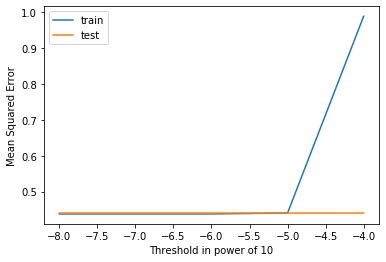

In [19]:
plt.plot(np.log10(threshold),new_MSE,label='train')
plt.plot(np.log10(threshold),new_MSE2,label='test')
plt.xlabel('Threshold in power of 10')
plt.ylabel('Mean Squared Error')
plt.legend()

# Part 3 Random 8 Features Selected

In [20]:
updated_df = normalized_df.iloc[:,:14].sample(8,axis=1)
updated_df['Run_Avg'] = normalized_df['Run_Avg']

In [21]:
training_set, test_set = train_test(updated_df)

In [22]:
X_train = training_set.iloc[:,:-1]
X_test = test_set.iloc[:,:-1]
Y_train = training_set['Run_Avg']
Y_test = test_set['Run_Avg']

## Train Data

0.01 0.5723047044860858


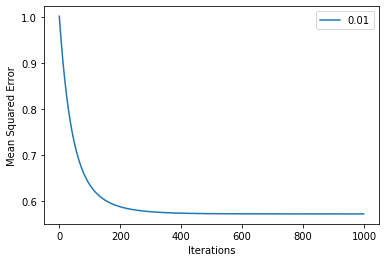

In [23]:
learning_rate = [0.01]
for lr in learning_rate:
    beta = np.c_[np.zeros(X_train.shape[1])]
    beta.shape=np.squeeze(beta).shape

    bias = np.c_[np.zeros(1)]
    bias.shape=np.squeeze(bias).shape
    
    MSE, count, beta, bias, array_MSE, array_iteration = gradient_descent(X_train,Y_train,beta,bias,lr,0.00000001)
    print(lr, MSE)
    plt.plot(array_iteration,array_MSE,label=lr)
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.legend()

In [24]:
updated_df

,MDIMA,MDIMC,STRM,NWG,VWN,VWM,MWG,KWG,Run_Avg
0,-0.998052,-0.753892,-0.999998,-1.516754,-0.741447,-0.741447,-1.516754,-1.210995,0.118479
1,-0.998052,-0.753892,-0.999998,-1.516754,-0.741447,-0.741447,-1.516754,-1.210995,-0.228050
2,-0.998052,-0.753892,-0.999998,-1.516754,-0.741447,-0.741447,-1.516754,-1.210995,-0.207353
3,-0.998052,-0.753892,-0.999998,-1.516754,-0.741447,-0.741447,-1.516754,-1.210995,-0.142960
4,-0.998052,-0.753892,-0.999998,-1.516754,-0.741447,-0.741447,-1.516754,-1.210995,0.135765
...,...,...,...,...,...,...,...,...,...
241595,1.558017,2.294244,0.999998,1.120450,0.794054,0.794054,1.120450,0.825764,-1.544386
241596,1.558017,2.294244,0.999998,1.120450,0.794054,0.794054,1.120450,0.825764,-0.920292
241597,1.558017,2.294244,0.999998,1.120450,0.794054,0.794054,1.120450,0.825764,-0.942074
241598,1.558017,2.294244,0.999998,1.120450,0.794054,0.794054,1.120450,0.825764,-1.129639


## Test Data

0.01 0.573808415314349


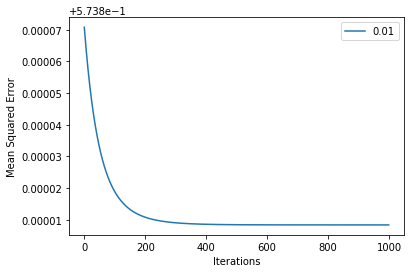

In [25]:
learning_rate = [0.01]
for lr in learning_rate:
    MSE, count, beta, bias, array_MSE, array_iteration = gradient_descent(X_test,Y_test,beta,bias,lr,0.00000001)
    print(lr, MSE)
    plt.plot(array_iteration,array_MSE,label=lr)
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.legend()

# Part 4 Handpicked 8 Features Selected

In [26]:
round(project_df.corr(),5)

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run_Avg
MWG,1.00000,0.00060,0.00930,0.10579,-0.00859,0.15877,0.01490,0.0000,0.35376,-0.00084,0.00000,0.00000,0.00000,0.00000,0.45903
NWG,0.00060,1.00000,0.00930,-0.00859,0.10579,0.01490,0.15877,0.0000,-0.00084,0.35376,0.00000,0.00000,0.00000,0.00000,0.34643
KWG,0.00930,0.00930,1.00000,0.14835,0.14835,-0.03456,-0.03456,-0.0000,-0.01199,-0.01199,0.00000,0.00000,0.00000,0.00000,-0.02036
MDIMC,0.10579,-0.00859,0.14835,1.00000,-0.20956,0.19743,0.08461,-0.0000,-0.13391,0.01053,-0.00000,-0.00000,0.00000,0.00000,-0.25208
NDIMC,-0.00859,0.10579,0.14835,-0.20956,1.00000,0.08461,0.19743,-0.0000,0.01053,-0.13391,-0.00000,-0.00000,0.00000,0.00000,-0.24345
MDIMA,0.15877,0.01490,-0.03456,0.19743,0.08461,1.00000,0.08810,-0.0000,-0.20271,-0.01903,0.00000,0.00000,0.00000,0.00000,-0.02308
NDIMB,0.01490,0.15877,-0.03456,0.08461,0.19743,0.08810,1.00000,-0.0000,-0.01903,-0.20271,0.00000,0.00000,0.00000,0.00000,-0.03369
KWI,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,1.0000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.01120
VWM,0.35376,-0.00084,-0.01199,-0.13391,0.01053,-0.20271,-0.01903,-0.0000,1.00000,0.00116,-0.00000,0.00000,0.00000,0.00000,0.20957
VWN,-0.00084,0.35376,-0.01199,0.01053,-0.13391,-0.01903,-0.20271,-0.0000,0.00116,1.00000,-0.00000,0.00000,0.00000,0.00000,0.14503


In [27]:
selected_df = normalized_df.drop(columns=['STRN','KWI','MDIMA','KWG','SB','NDIMB'])

In [28]:
training_set, test_set = train_test(selected_df)

In [29]:
X_train = training_set.iloc[:,:-1]
X_test = test_set.iloc[:,:-1]
Y_train = training_set['Run_Avg']
Y_test = test_set['Run_Avg']

## Train Data

0.01 0.44639694422050524


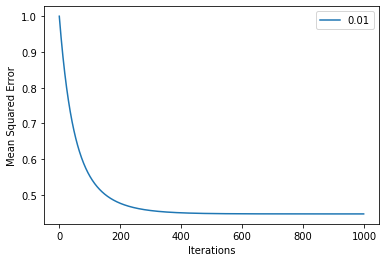

In [30]:
for lr in learning_rate:
    beta = np.c_[np.zeros(X_train.shape[1])]
    beta.shape=np.squeeze(beta).shape

    bias = np.c_[np.zeros(1)]
    bias.shape=np.squeeze(bias).shape
    
    MSE, count, beta, bias, array_MSE, array_iteration = gradient_descent(X_train,Y_train,beta,bias,lr,0.0000001)
    print(lr, MSE)
    plt.plot(array_iteration,array_MSE,label=lr)
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.legend()

In [31]:
selected_df

,MWG,NWG,MDIMC,NDIMC,VWM,VWN,STRM,SA,Run_Avg
0,-1.516754,-1.516754,-0.753892,-0.753892,-0.741447,-0.741447,-0.999998,-0.999998,0.118479
1,-1.516754,-1.516754,-0.753892,-0.753892,-0.741447,-0.741447,-0.999998,-0.999998,-0.228050
2,-1.516754,-1.516754,-0.753892,-0.753892,-0.741447,-0.741447,-0.999998,0.999998,-0.207353
3,-1.516754,-1.516754,-0.753892,-0.753892,-0.741447,-0.741447,-0.999998,0.999998,-0.142960
4,-1.516754,-1.516754,-0.753892,-0.753892,-0.741447,-0.741447,-0.999998,-0.999998,0.135765
...,...,...,...,...,...,...,...,...,...
241595,1.120450,1.120450,2.294244,2.294244,0.794054,0.794054,0.999998,0.999998,-1.544386
241596,1.120450,1.120450,2.294244,2.294244,0.794054,0.794054,0.999998,-0.999998,-0.920292
241597,1.120450,1.120450,2.294244,2.294244,0.794054,0.794054,0.999998,-0.999998,-0.942074
241598,1.120450,1.120450,2.294244,2.294244,0.794054,0.794054,0.999998,0.999998,-1.129639


## Test Data

0.01 0.4463246701289338


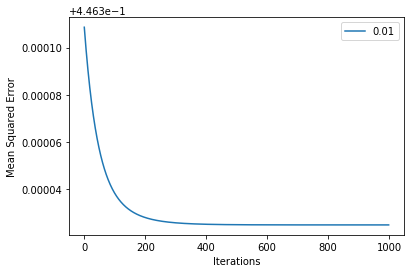

In [32]:
for lr in learning_rate:
    MSE, count, beta, bias, array_MSE, array_iteration = gradient_descent(X_test,Y_test,beta,bias,lr,0.00000001)
    print(lr, MSE)
    plt.plot(array_iteration,array_MSE,label=lr)
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.legend()